In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path='/content/drive/My Drive/DMDataset.zip'
with ZipFile(file_path,'r') as zip_ref:
  zip_ref.extractall('/content/data')

  data=pd.read_csv('/content/data/household_power_consumption.txt', sep=';', low_memory=False)
  data.head()



In [4]:
print(data.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [5]:
# Load the dataset (without automatic type conversion for now)
data = pd.read_csv('/content/data/household_power_consumption.txt', sep=';', low_memory=False)

# Replace '?' with NaN to handle missing value
data.replace('?', np.nan, inplace=True)

# Convert 'Date' and 'Time' to datetime format
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Set the datetime as index
data.set_index('DateTime', inplace=True)

# Drop the original 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Columns to convert
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert each to float (coerce invalid values to NaN)
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with any NaN values
data.dropna(inplace=True)



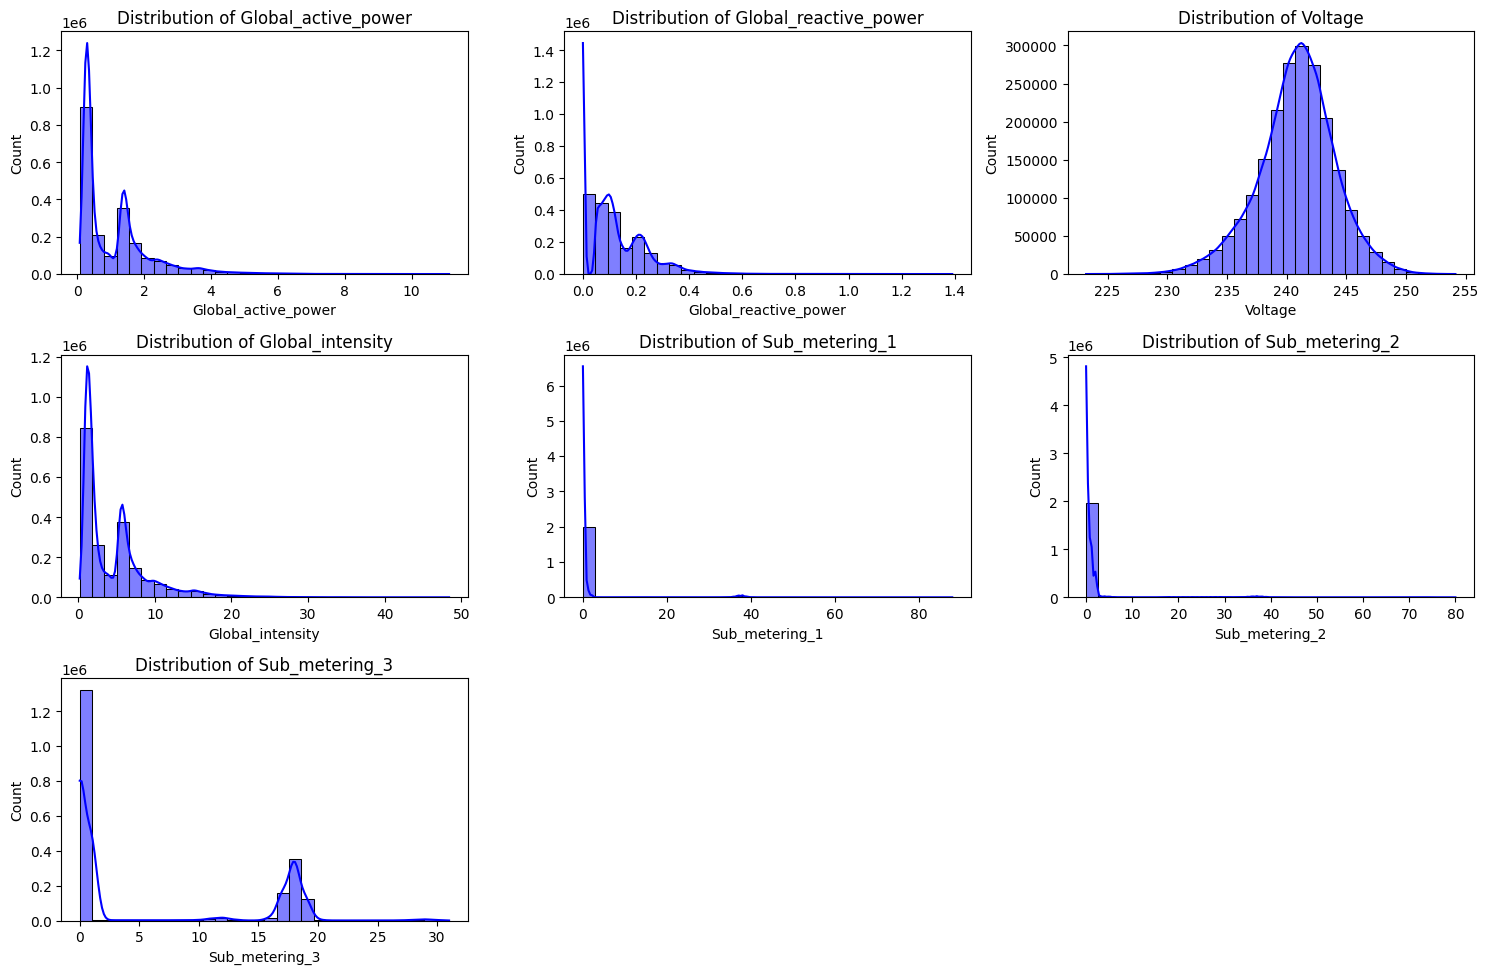

In [7]:
numerical_features=  ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(3,3,i)
  sns.histplot(data[feature], bins=30, kde=True, color='blue')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')


plt.tight_layout()
plt.show()



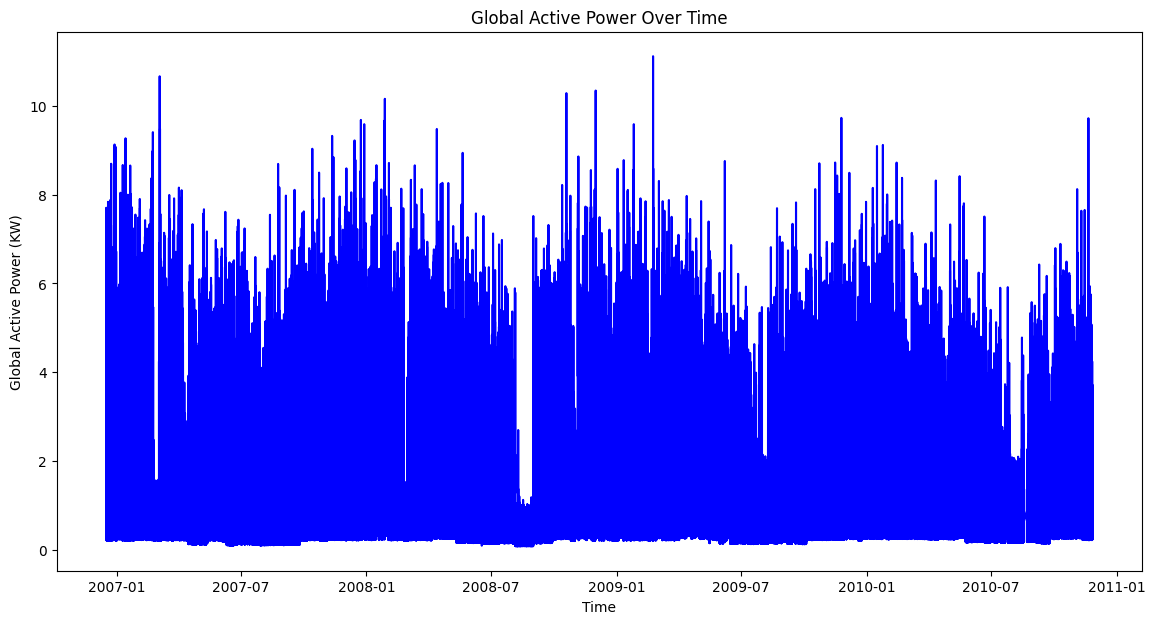

In [8]:
# plot Global active power over time

plt.figure(figsize=(14,7))
plt.plot(data.index, data['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (KW)')
plt.show()

/tmp/ipython-input-9-4033927860.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data= data['Global_active_power'].resample('H').mean()


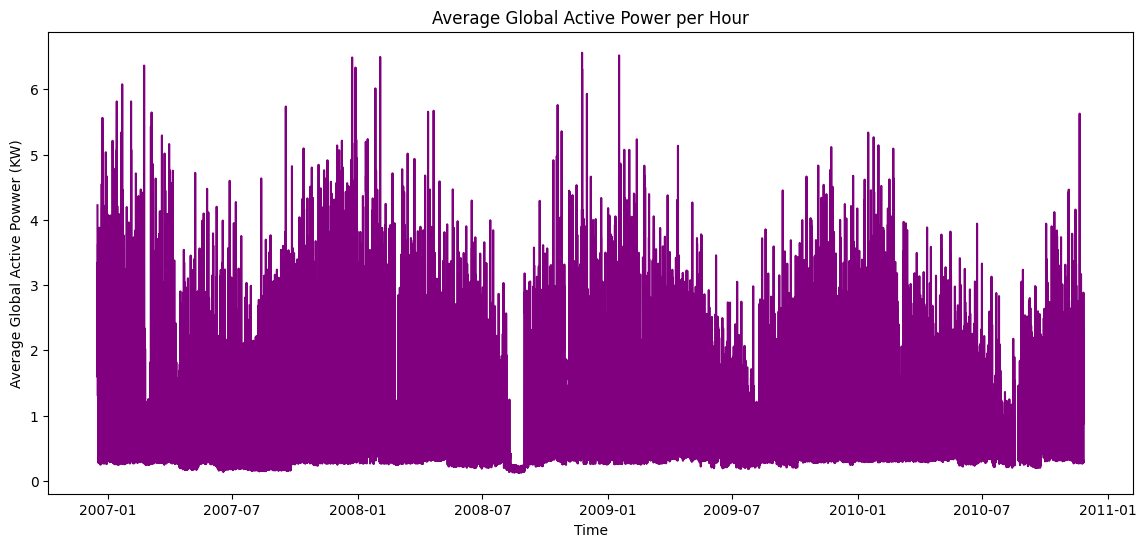

In [9]:
# Hourly averge
hourly_data= data['Global_active_power'].resample('H').mean()

plt.figure(figsize=(14,6))
plt.plot(hourly_data, color= 'purple')
plt.title('Average Global Active Power per Hour')
plt.xlabel('Time')
plt.ylabel('Average Global Active Powwer (KW)')
plt.show()

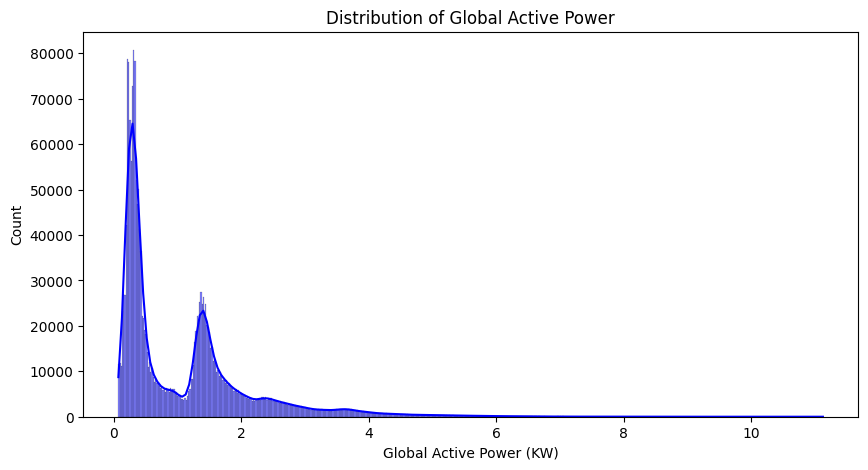

In [10]:
# Distribution of Global Active Power

plt.figure(figsize=(10,5))
sns.histplot(data['Global_active_power'], kde=True, color='blue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (KW)')
plt.show()

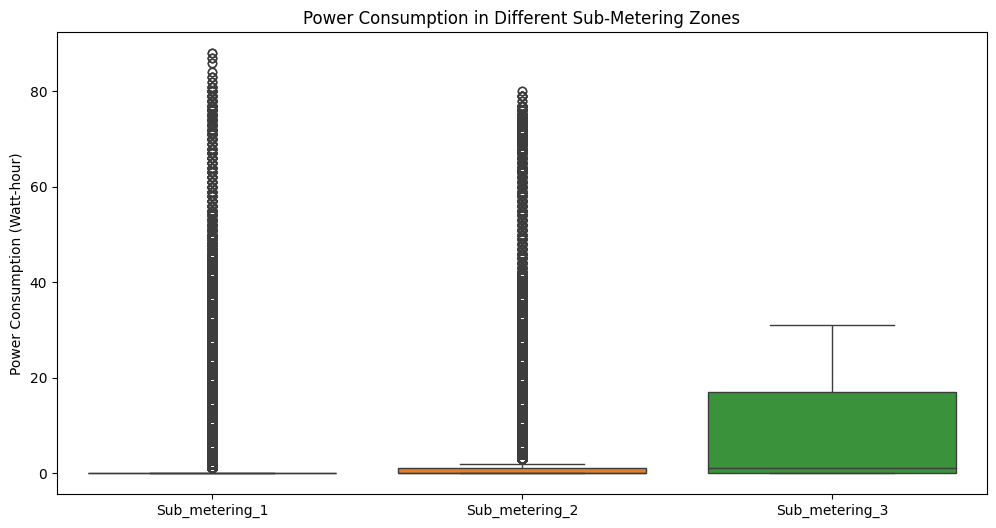

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title('Power Consumption in Different Sub-Metering Zones')
plt.ylabel('Power Consumption (Watt-hour)')
plt.show()

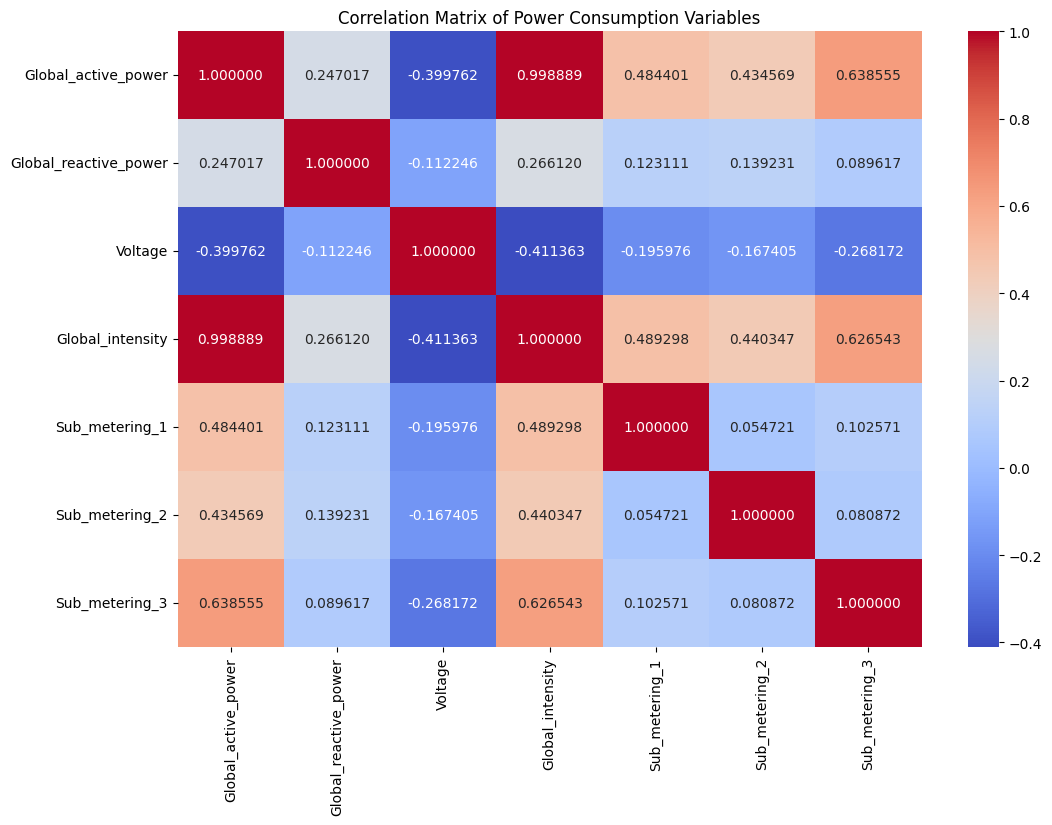

In [13]:
#correction matrix
correlation_matrix= data.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="2f")
plt.title('Correlation Matrix of Power Consumption Variables')
plt.show()